In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
#len(Ratinglist)
from collections import Counter

%matplotlib inline

In [2]:
file=open("/Users/Arshi/Desktop/amazon-meta.txt","r")

content=file.readlines()


In [3]:
len(content)

15010574

In [4]:
#First 30 lines of the file
for i in range(30):
    print(content[i])

# Full information about Amazon Share the Love products

Total items: 548552



Id:   0

ASIN: 0771044445

  discontinued product



Id:   1

ASIN: 0827229534

  title: Patterns of Preaching: A Sermon Sampler

  group: Book

  salesrank: 396585

  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X

  categories: 2

   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]

   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]

  reviews: total: 2  downloaded: 2  avg rating: 5

    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9

    2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5



Id:   2

ASIN: 0738700797

  title: Candlemas: Feast of Flames

  group: Book

  salesrank: 168596

  similar: 5  0738700827  1567184960  1567182836  0738700525  0738700940

  categories: 2

   |Books[283155]|Subjects[1000]|Religio

In [5]:
Ratinglist=[]

for i in range(len(content)):
    if (re.search(r"cutomer: [a-z0-9A-Z]+\s rating: [0-5]",content[i])):
        string=re.findall(r"cutomer: [a-z0-9A-Z]+\s rating: [0-5]",content[i])
        string1=string[0]
        #test=string1.replace("avg rating: ", "")
        Ratinglist.append(re.sub("cutomer: [a-z0-9A-Z]+\s rating: ", "",string1))
    else:
        continue    
        
#Ratinglist        

In [6]:
len(Ratinglist)

4992534

In [7]:
Counter(Ratinglist)

Counter({'1': 388855, '2': 282456, '3': 430353, '4': 953299, '5': 2937571})

In [8]:
Ratinglist1={'1': 388855, '2': 282456, '3': 430353, '4': 953299, '5': 2937571}
Ratinglist1.keys()

dict_keys(['1', '2', '3', '4', '5'])

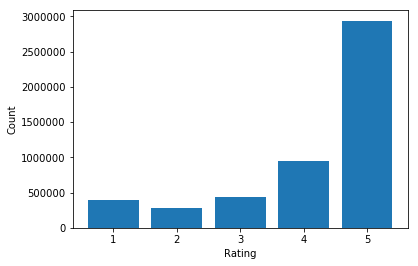

In [9]:
plt.bar(range(len(Ratinglist1)), Ratinglist1.values(), align='center')
plt.xticks(range(len(Ratinglist1)), list(Ratinglist1.keys()))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(False)
plt.show()

In [10]:
"""
Trustworthiness of ratings:
There seem to be a positive bias in the way users rate products.
Very few people rate products bad. 

Inference: People tend to rate products only when they are happy with it.

"""

'\nTrustworthiness of ratings:\nThere seem to be a positive bias in the way users rate products.\nVery few people rate products bad. \n\nInference: People tend to rate products only when they are happy with it.\n\n'

In [11]:
Categorylist=[]

for i in range(len(content)):
    if (re.search(r"\|Books",content[i])):
        test=re.sub("\s\s+","",content[i])
        Categorylist.append(re.sub("\\n","",test))
    else:
        continue    

#len(Categorylist)
Categorylist

['|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Earth-Based Religions[12472]|Wicca[12484]',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Earth-Based Religions[12472]|Witchcraft[12486]',
 '|Books[283155]|Subjects[1000]|Home & Garden[48]|Crafts & Hobbies[5126]|General[5144]',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Reference[172810]|Commentaries[12155]|New Testament[12159]',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Christian Living[12333]|Discipleship[12335]',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Bibles[12059]|Translations[764432]|Life Application[572080]',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Bible

In [12]:
Categorylist=[]

for i in range(len(content)):
    if (re.search(r"\|Books",content[i])):
        #test=re.sub("\s\s+","",content[i])
        Categorylist.append(re.split("\|",re.sub("\\n","",re.sub("\s\s+","",content[i]))))
    else:
        continue    

labels = ['Level0', 'Level1', 'Level2', 'Level3', 'Level4','Level5','Level6','Level7','Level8']
Testdf = pd.DataFrame.from_records(Categorylist, columns=labels)
Testdf.drop("Level0", axis=1, inplace=True)
Testdf.head()

,Level1,Level2,Level3,Level4,Level5,Level6,Level7,Level8
0,Books[283155],Subjects[1000],Religion & Spirituality[22],Christianity[12290],Clergy[12360],Preaching[12368],None,None
1,Books[283155],Subjects[1000],Religion & Spirituality[22],Christianity[12290],Clergy[12360],Sermons[12370],None,None
2,Books[283155],Subjects[1000],Religion & Spirituality[22],Earth-Based Religions[12472],Wicca[12484],None,None,None
3,Books[283155],Subjects[1000],Religion & Spirituality[22],Earth-Based Religions[12472],Witchcraft[12486],None,None,None
4,Books[283155],Subjects[1000],Home & Garden[48],Crafts & Hobbies[5126],General[5144],None,None,None


In [13]:
Testdf1=Testdf[Testdf.Level1=="Books[283155]"]

In [14]:
Testdf1.groupby( ['Level1', 'Level2'] ).count()

Level3   Level4   Level5  Level6  \
Level1        Level2                                                        
Books[283155] By Publisher[298531]         2192     2192     2038     644   
              Formats[504358]             34524    34522    22768    2273   
              Specialty Stores[504360]    27508    19678    18518    6641   
              Subjects[1000]            1222836  1222836  1116166  499868   

                                        Level7  Level8  
Level1        Level2                                    
Books[283155] By Publisher[298531]           0       0  
              Formats[504358]              395       0  
              Specialty Stores[504360]     153       0  
              Subjects[1000]            104631    6367

In [15]:
# The above view shows there are product categories that dont have too many entries in them
# These can be merged with other more populated categories
# The view can be expanded by adding more levels to the cell above to identify granual data

# 1. Algorithm thinking
# To build a product categorization from scratch, I will follow the logic of how recommendation systems are build
# Leveraging data of also viewed/co purchased products and using similarity scores to identify groups of products 
# that are similar to each other
# These product groups can then be categorised as product categories

# 2. Product Thinking
# a. Is it a good idea to show users the categorization hierarchy for items?
# Yes, becouse it makes it easier for the customer to find what they want and view what other options they have.
# A customer may have a broad idea of what he wants and a product category can help him/ her narrow down on on specifics
# Example: buying furniture for kids

# b. Is it a good idea to show users similar/co-purchased items?
# Yes, it allows user to view available options. And ensures the user is engaged with the website/ app and 
# not jumping to other avenues to look for alternates.

# c. Is it a good idea to show users reviews and ratings for items?
# Yes, Reviews and Rating help in providing a quick overview of the product and help in decision making.
# They allow the customer to quickly filter his options to a narrower set.